##  Regression Trees

We will be using the Boston Housing dataset for our regression example. This dataset contains information about houses in the suburbs of Boston. There are 506 samples and 14 attributes. For simplicity and visualization purposes, we will only use two — MEDV (median value of owner-occupied homes in $1000s) as the target and LSTAT (percentage of lower status of the population) as the feature.

More info at [here](https://towardsdatascience.com/https-medium-com-lorrli-classification-and-regression-analysis-with-decision-trees-c43cdbc58054)

In [16]:
import pandas as pd
from sklearn import datasets

boston = datasets.load_boston()            # Load Boston Dataset
df = pd.DataFrame(boston.data[:, 12])      # Create DataFrame using only the LSAT feature
df.columns = ['LSTAT']
df['MEDV'] = boston.target                 # Create new column with the target MEDV
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [17]:
from sklearn.tree import DecisionTreeRegressor    # Import decision tree regression model

X = df[['LSTAT']].values                          # Assign matrix X
y = df['MEDV'].values                             # Assign vector y

sort_idx = X.flatten().argsort()                  # Sort X and y by ascending values of X
X = X[sort_idx]
y = y[sort_idx]

Rtree = DecisionTreeRegressor(criterion='mse',     # Initialize and fit regressor
                             max_depth=3)         

RT_model =Rtree.fit(X, y)

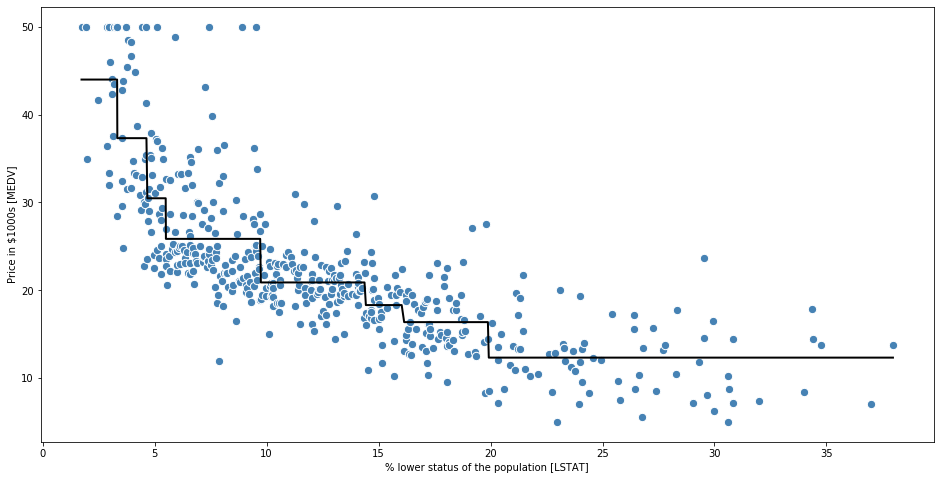

In [18]:
import numpy as np
import matplotlib.pyplot as plt

y_predt=RT_model.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                  # Plot actual target against features
            edgecolor='white', s=70)
plt.plot(X, y_predt,                      # Plot predicted target against features
         color='black', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

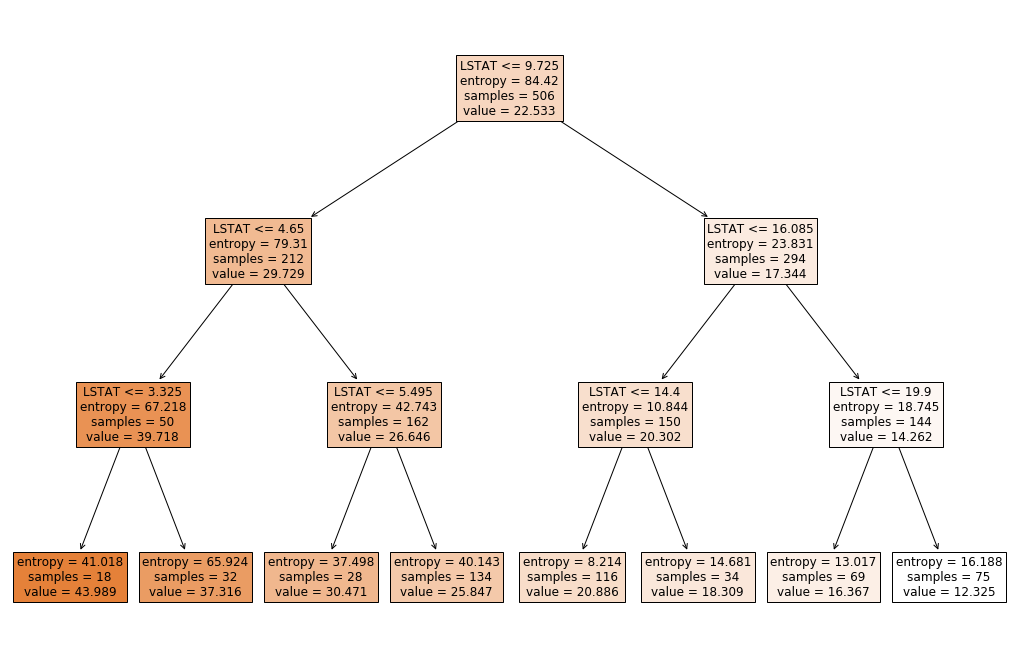

In [19]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(18, 12))
tree.plot_tree(Rtree, max_depth=4,
               fontsize=12, filled = True,
               feature_names = ['LSTAT'],
               class_names=['MEDV'])
plt.show()
# fig.savefig('imagename.png')

### Visualizing the tree using graphviz

In [67]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

graph = Source(export_graphviz(Rtree, out_file=None, feature_names=['LSTAT'],impurity = True))
# graph.format = 'png'
graph.render('BostonHousingTree', view=True);


### Toyota Corolla Prices Regression Analysis

Columns:

- Age: Age in years
- KM: Accumulated Kilometers on odometer
- FuelType: Fuel Type (Petrol, Diesel, CNG)
- HP: Horse Power
- MetColor: Metallic Color? (Yes=1, No=0)
- Automatic: Automatic ( (Yes=1, No=0)
- CC: Cylinder Volume in cubic centimeters
- Doors: Number of doors
- Weight: Weight in Kilograms
- Price: Offer Price in EUROs

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')


/Users/enayat/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
dataset_Toyota = pd.read_csv('./datasets/ToyotaCorolla.csv')
# dataset_Toyota.head()
# dataset_Toyota.count()
# dataset_Toyota.isnull().sum()

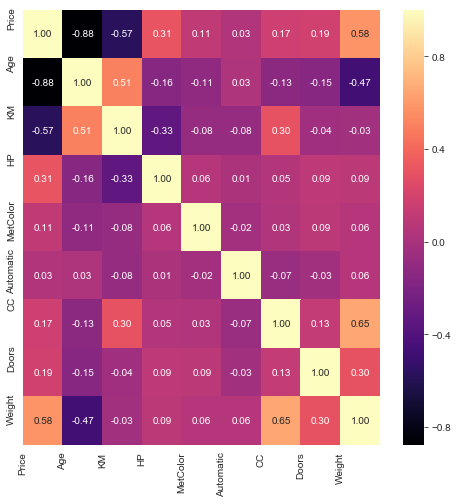

In [23]:
corr = dataset_Toyota.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [24]:
dataset_Toyota = pd.get_dummies(dataset_Toyota)
dataset_Toyota.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0


In [39]:
X = dataset_Toyota.drop('Price', axis = 1).values
y = dataset_Toyota.iloc[:, 0].values.reshape(-1,1)

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [41]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 11)
Shape of X_test:  (359, 11)
Shape of y_train:  (1077, 1)
Shape of y_test (359, 1)


In [42]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [44]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.8193262156045742
R2_score (train):  1.0
R2_score (test):  0.8444979033079358
RMSE:  1485.5008637345145


In [34]:
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt_test))

In [ ]:
# tree.plot_tree(regressor_dt);

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)


CV:  0.8480754345159047
R2_score (train):  0.8702260786694702
R2_score (test):  0.8621869690956067
RMSE:  1398.459605142219


In [38]:
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred_linear_test))

In [68]:
# More example: https://tdgunes.com/COMP6246-2018Fall/lab3_solution/index.html